In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

In [ ]:
df = df = pd.read_excel("açoes_magalu.xlsx", parse_dates=True, index_col=0)
df = pd.DataFrame(df["Fechamento"])
df

In [42]:
df = df.astype("float32")

In [43]:
train = df[0:180,:]
test = df[180:,:]

In [44]:
def prepare_data(data, lags=1):
  X, y = [], []
  for row in range(len(data)-lags -1):
    a = data[row:(row+lags), 0]
    X.append(a)
    y.append(data[row+lags, 0])
  return np.array(X), np.array(y)

In [45]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

Text(0.5, 1.0, 'Dados passados em um período')

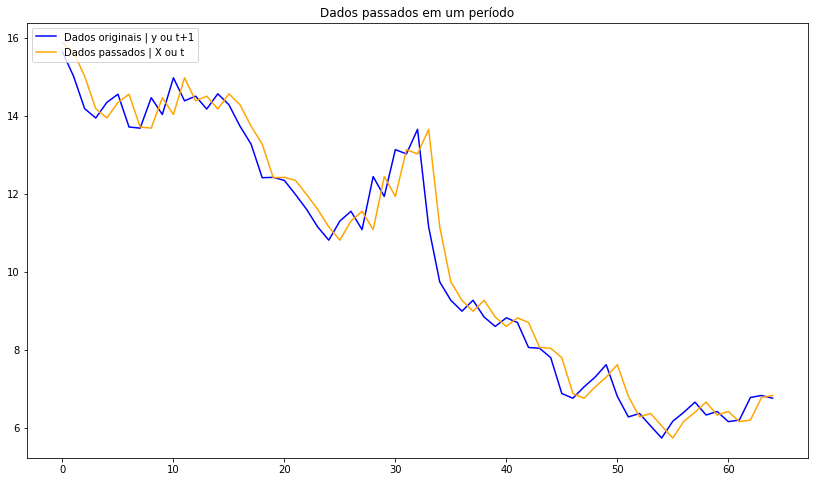

In [46]:
plt.figure(figsize=(14,8))
plt.plot(y_test, label="Dados originais | y ou t+1", color="blue")
plt.plot(X_test, label="Dados passados | X ou t", color="orange")
plt.legend(loc="upper left")
plt.title("Dados passados em um período")

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

In [48]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print(f"Pontuação de treino - MSE: {train_score:.2f} \nRMSE:{math.sqrt(train_score):.2f}")
print("="*30)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f"Pontuação de teste - MSE: {test_score:.2f} \nRMSE:{math.sqrt(test_score):.2f}")

Pontuação de treino - MSE: 0.31 
RMSE:0.55
Pontuação de teste - MSE: 0.46 
RMSE:0.68


In [49]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [50]:
train_predict_plot = np.empty_like(df)
train_predict_plot[:,:] = np.nan
train_predict_plot[lags: len(train_predict)+lags, :] = train_predict

In [51]:
test_predict_plot = np.empty_like(df)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(df) -1, :] = test_predict

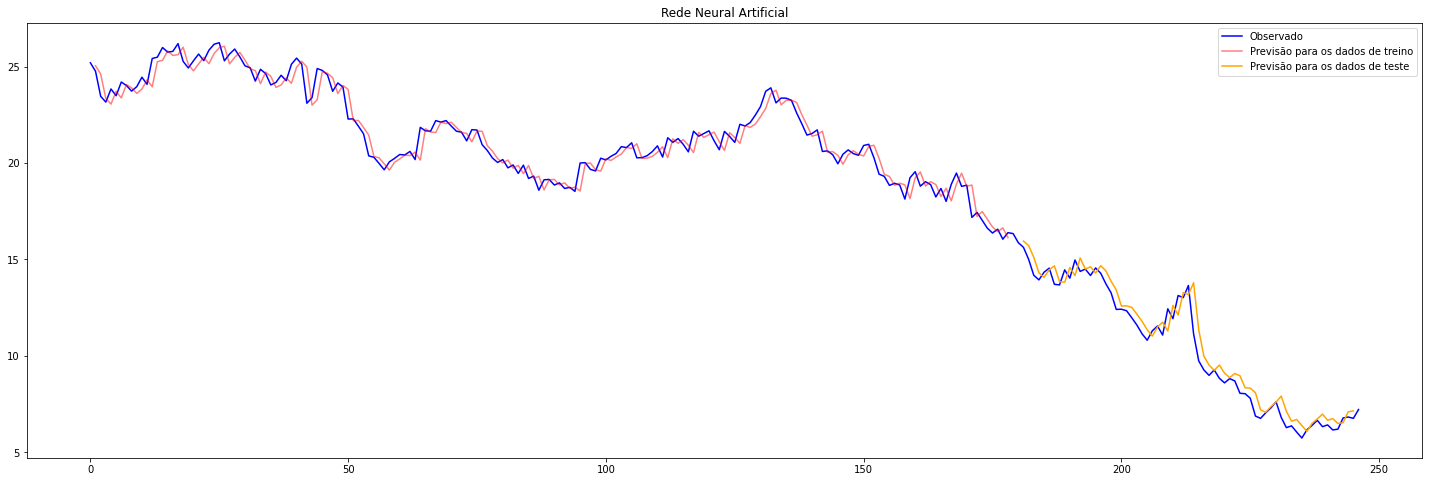

In [53]:
plt.figure(figsize=(25,8))
plt.plot(df, label="Observado", color="blue")
plt.plot(train_predict_plot, label="Previsão para os dados de treino", color="red", alpha=0.5)
plt.plot(test_predict_plot, label="Previsão para os dados de teste", color="Orange")
plt.legend(loc="best")
plt.title("Rede Neural Artificial");